# Identifying Fraudlent User

##### **Problem Statement:**  *E-commerce websites often transact huge amounts of money. Whenever a huge amount of money is moved, there is a high risk of users performing fraudulent activities, e.g. using stolen credit cards, laundering money, etc*

#### Objective: *The goal of this challenge is to build a machine learning model that predicts the probability that the first transaction of a new user is fraudulent*

In [289]:
## Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Analysis

In [2]:
# Reading data containing transaction details
df=pd.read_csv("Candidate_tech_evaluation_candidate_copy_data science_fraud.csv")

In [3]:
df.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,149671,285108,7/15/2015 4:36,9/10/2015 14:17,31,HZAKVUFTDOSFD,Direct,Chrome,M,49,2.818400e+09,0
1,15611,131009,1/24/2015 12:29,4/13/2015 4:53,31,XGQAJSOUJIZCC,SEO,IE,F,21,3.251268e+09,0
2,73178,328855,3/11/2015 0:54,4/5/2015 12:23,16,VCCTAYDCWKZIY,Direct,IE,M,26,2.727760e+09,0
3,84546,229053,1/7/2015 13:19,1/9/2015 10:12,29,MFFIHYNXCJLEY,SEO,Chrome,M,34,2.083420e+09,0
4,35978,108439,2/8/2015 21:11,4/9/2015 14:26,26,WMSXWGVPNIFBM,Ads,FireFox,M,33,3.207913e+09,0


In [4]:
df.shape

(120000, 12)

In [5]:
# dropping unnamed:0 column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,285108,7/15/2015 4:36,9/10/2015 14:17,31,HZAKVUFTDOSFD,Direct,Chrome,M,49,2.818400e+09,0
1,131009,1/24/2015 12:29,4/13/2015 4:53,31,XGQAJSOUJIZCC,SEO,IE,F,21,3.251268e+09,0
2,328855,3/11/2015 0:54,4/5/2015 12:23,16,VCCTAYDCWKZIY,Direct,IE,M,26,2.727760e+09,0
3,229053,1/7/2015 13:19,1/9/2015 10:12,29,MFFIHYNXCJLEY,SEO,Chrome,M,34,2.083420e+09,0
4,108439,2/8/2015 21:11,4/9/2015 14:26,26,WMSXWGVPNIFBM,Ads,FireFox,M,33,3.207913e+09,0
...,...,...,...,...,...,...,...,...,...,...,...
119995,116698,2/26/2015 11:51,4/16/2015 22:57,46,UJYRDGZXTFFJG,Ads,Chrome,M,18,2.509395e+09,0
119996,122699,8/1/2015 18:40,8/25/2015 7:56,26,EMMTCPTUYQYPX,Ads,IE,F,36,2.946612e+09,0
119997,115120,7/25/2015 12:50,9/3/2015 4:10,41,YSZGGEARGETEU,SEO,Chrome,M,31,5.570629e+08,0
119998,87098,4/2/2015 21:11,6/22/2015 16:51,50,BJDWRJULJZNOV,SEO,Chrome,F,43,2.687887e+09,0


In [7]:
# Checking for null values
df.isnull().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [8]:
# Checking NaN
df.isna().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [9]:
## Checking for duplicate entries
df.duplicated().sum()

0

In [10]:
#Checking for unique values
df.nunique()

user_id           120000
signup_time       109111
purchase_time     100058
purchase_value       120
device_id         110599
source                 3
browser                5
sex                    2
age                   57
ip_address        114134
class                  2
dtype: int64

In [11]:
## It is observed that an ip_address and device_id are used more than once

In [12]:
# Reading data containing country and ip address ranges
df_ip=pd.read_excel('Candidate_tech_evaluation_candidate_copy_datascience_IpAddress_to_Country.xlsx')

In [13]:
df_ip.sort_values(by='country')

,lower_bound_ip_address,upper_bound_ip_address,country
53164,3034482688,3034484735,Afghanistan
49110,2942967808,2942975999,Afghanistan
29368,1728976896,1728977151,Afghanistan
31650,1744547840,1744548863,Afghanistan
30857,1743887360,1743888383,Afghanistan
...,...,...,...
91595,3288616960,3288617215,Zimbabwe
92379,3318988800,3319005183,Zimbabwe
3941,693071872,693072895,Zimbabwe
92318,3315326976,3315331071,Zimbabwe


## Feature Engineering

In [14]:
## Function returns country based on ip address
def ip_to_country(ip):
    '''Function to return country based on ip_address
    Input:ip address in int format
    Output:Country name if ipaddress exists in range and None if no information regarding the country is available'''
    country = df_ip.loc[(df_ip['lower_bound_ip_address'] <= ip) & (ip <= df_ip['upper_bound_ip_address']), 'country']     
    try:         
        return country.item()     
    except ValueError:         
        return "None"

In [15]:
##  testing function ip_to_country
ip_to_country(2.727760e+09)

'United States'

In [16]:
## Adding country column to the data by using ip_to_country function
df['country']=df['ip_address'].map(ip_to_country)

In [17]:
## Checking the column "country"
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,285108,7/15/2015 4:36,9/10/2015 14:17,31,HZAKVUFTDOSFD,Direct,Chrome,M,49,2.818400e+09,0,United States
1,131009,1/24/2015 12:29,4/13/2015 4:53,31,XGQAJSOUJIZCC,SEO,IE,F,21,3.251268e+09,0,United Kingdom
2,328855,3/11/2015 0:54,4/5/2015 12:23,16,VCCTAYDCWKZIY,Direct,IE,M,26,2.727760e+09,0,United States
3,229053,1/7/2015 13:19,1/9/2015 10:12,29,MFFIHYNXCJLEY,SEO,Chrome,M,34,2.083420e+09,0,Korea Republic of
4,108439,2/8/2015 21:11,4/9/2015 14:26,26,WMSXWGVPNIFBM,Ads,FireFox,M,33,3.207913e+09,0,Brazil


In [18]:
## Creating feature "#times_device_used" to find number of times the same device has been used based on device_id
def times_device_used(data):
    '''Returns Data Frame containing data about number of times a device has been used'''
    multiple_usage_device=data[['user_id','device_id']].groupby('device_id').count().reset_index()
    multiple_usage_device.rename(columns={'user_id':'#times_device_used'},inplace=True)
    return multiple_usage_device

In [19]:
device_usage=times_device_used(df)

In [20]:
df=df.merge(right=device_usage,how='left')

In [21]:
## Creating feature "#times_ip_used" to find number of times the same ip has been used based on ip_address
def times_ip_used(data):
    '''Returns Data Frame containing data about number of times an ip has been used'''
    multiple_usage_ip=data[['user_id','ip_address']].groupby('ip_address').count().reset_index()
    multiple_usage_ip.rename(columns={'user_id':'#times_ip_used'},inplace=True)
    return multiple_usage_ip

In [22]:
ip_usage=times_ip_used(df)

In [23]:
df=df.merge(right=ip_usage,how='left')

In [24]:
## Checking the new features in the data frame
df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,#times_device_used,#times_ip_used
0,285108,7/15/2015 4:36,9/10/2015 14:17,31,HZAKVUFTDOSFD,Direct,Chrome,M,49,2.818400e+09,0,United States,2,1
1,131009,1/24/2015 12:29,4/13/2015 4:53,31,XGQAJSOUJIZCC,SEO,IE,F,21,3.251268e+09,0,United Kingdom,1,1
2,328855,3/11/2015 0:54,4/5/2015 12:23,16,VCCTAYDCWKZIY,Direct,IE,M,26,2.727760e+09,0,United States,1,1
3,229053,1/7/2015 13:19,1/9/2015 10:12,29,MFFIHYNXCJLEY,SEO,Chrome,M,34,2.083420e+09,0,Korea Republic of,1,1
4,108439,2/8/2015 21:11,4/9/2015 14:26,26,WMSXWGVPNIFBM,Ads,FireFox,M,33,3.207913e+09,0,Brazil,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,116698,2/26/2015 11:51,4/16/2015 22:57,46,UJYRDGZXTFFJG,Ads,Chrome,M,18,2.509395e+09,0,Netherlands,1,1
119996,122699,8/1/2015 18:40,8/25/2015 7:56,26,EMMTCPTUYQYPX,Ads,IE,F,36,2.946612e+09,0,China,1,1
119997,115120,7/25/2015 12:50,9/3/2015 4:10,41,YSZGGEARGETEU,SEO,Chrome,M,31,5.570629e+08,0,United States,1,1
119998,87098,4/2/2015 21:11,6/22/2015 16:51,50,BJDWRJULJZNOV,SEO,Chrome,F,43,2.687887e+09,0,Switzerland,1,1


In [25]:
## Converting time to datetime data type
df['signup_time']=pd.to_datetime(df['signup_time'])
df['purchase_time']=pd.to_datetime(df['purchase_time'])

In [26]:
## Calculating time between purchase and signup in minutes
df['time_gap']=(df['purchase_time']-df['signup_time']).astype('timedelta64[m]')

In [27]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,#times_device_used,#times_ip_used,time_gap
0,285108,2015-07-15 04:36:00,2015-09-10 14:17:00,31,HZAKVUFTDOSFD,Direct,Chrome,M,49,2.818400e+09,0,United States,2,1,82661.0
1,131009,2015-01-24 12:29:00,2015-04-13 04:53:00,31,XGQAJSOUJIZCC,SEO,IE,F,21,3.251268e+09,0,United Kingdom,1,1,113304.0
2,328855,2015-03-11 00:54:00,2015-04-05 12:23:00,16,VCCTAYDCWKZIY,Direct,IE,M,26,2.727760e+09,0,United States,1,1,36689.0
3,229053,2015-01-07 13:19:00,2015-01-09 10:12:00,29,MFFIHYNXCJLEY,SEO,Chrome,M,34,2.083420e+09,0,Korea Republic of,1,1,2693.0
4,108439,2015-02-08 21:11:00,2015-04-09 14:26:00,26,WMSXWGVPNIFBM,Ads,FireFox,M,33,3.207913e+09,0,Brazil,1,1,85995.0


In [28]:
## Checking immediate transcations
df[df['time_gap']==0].shape

(5936, 15)

In [29]:
## Checking immediate transactions that are fraudlent
df[(df['time_gap']==0) & (df['class']==1)].shape

(5936, 15)

In [30]:
## It is observed that all the transactions that occured within 0 mins of signing up are fraudlent, This indicates that the feature time_gap should be one of the most important features

In [31]:
#### Mapping Values to Browsers (1:Chrome,2:IE,3:Safari,4:Firefox,5:Opera)

In [32]:
df['browser'].value_counts()

Chrome     48652
IE         29138
Safari     19620
FireFox    19615
Opera       2975
Name: browser, dtype: int64

In [33]:
df['browser']=df['browser'].map({'Chrome':1,'IE':2,'Safari':3,'FireFox':4,'Opera':5})

In [34]:
#### Mapping Values to Source (1:SEO,2:Ads,3:Direct)

In [35]:
df['source'].value_counts()

SEO       48297
Ads       47461
Direct    24242
Name: source, dtype: int64

In [36]:
df['source']=df['source'].map({'SEO':1,'Ads':2,'Direct':3})

In [37]:
#### Mapping Values to Gender (0:Male,1:Female)

In [38]:
df['sex']=df['sex'].map({'M':0,'F':1})

In [39]:
## Checking data frame 
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,#times_device_used,#times_ip_used,time_gap
0,285108,2015-07-15 04:36:00,2015-09-10 14:17:00,31,HZAKVUFTDOSFD,3,1,0,49,2.818400e+09,0,United States,2,1,82661.0
1,131009,2015-01-24 12:29:00,2015-04-13 04:53:00,31,XGQAJSOUJIZCC,1,2,1,21,3.251268e+09,0,United Kingdom,1,1,113304.0
2,328855,2015-03-11 00:54:00,2015-04-05 12:23:00,16,VCCTAYDCWKZIY,3,2,0,26,2.727760e+09,0,United States,1,1,36689.0
3,229053,2015-01-07 13:19:00,2015-01-09 10:12:00,29,MFFIHYNXCJLEY,1,1,0,34,2.083420e+09,0,Korea Republic of,1,1,2693.0
4,108439,2015-02-08 21:11:00,2015-04-09 14:26:00,26,WMSXWGVPNIFBM,2,4,0,33,3.207913e+09,0,Brazil,1,1,85995.0


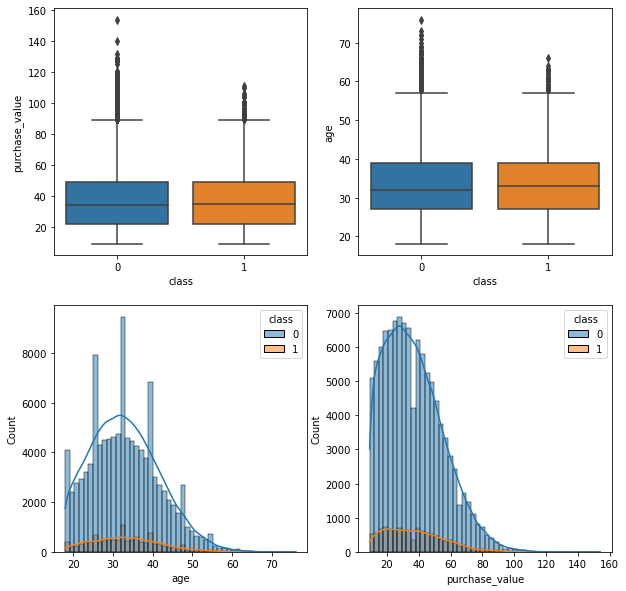

In [40]:
#### Checking for distributions of continous variables purchase_value and age based on class
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.boxplot(x=df['class'],y=df['purchase_value'])
plt.subplot(222)
sns.boxplot(x=df['class'],y=df['age'])
plt.subplot(223)
sns.histplot(data=df,x="age",hue='class',kde=True,bins=50)
plt.subplot(224)
sns.histplot(data=df,x="purchase_value",hue='class',kde=True,bins=50)

plt.show()



In [41]:
##There are few outliers but some of them seem to be genuine transactions

In [42]:
## Converting country names to numeric classes

df['country']=df['country'].factorize()[0]

In [43]:
#### Converting Categorical columns to category type
cat_cols=['source','browser','sex','class','country','device_id','user_id']

In [44]:
for i in cat_cols:
    df[i]=df[i].astype('category')

In [45]:
## Checking data frame after all feature engineering steps
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,#times_device_used,#times_ip_used,time_gap
0,285108,2015-07-15 04:36:00,2015-09-10 14:17:00,31,HZAKVUFTDOSFD,3,1,0,49,2.818400e+09,0,0,2,1,82661.0
1,131009,2015-01-24 12:29:00,2015-04-13 04:53:00,31,XGQAJSOUJIZCC,1,2,1,21,3.251268e+09,0,1,1,1,113304.0
2,328855,2015-03-11 00:54:00,2015-04-05 12:23:00,16,VCCTAYDCWKZIY,3,2,0,26,2.727760e+09,0,0,1,1,36689.0
3,229053,2015-01-07 13:19:00,2015-01-09 10:12:00,29,MFFIHYNXCJLEY,1,1,0,34,2.083420e+09,0,2,1,1,2693.0
4,108439,2015-02-08 21:11:00,2015-04-09 14:26:00,26,WMSXWGVPNIFBM,2,4,0,33,3.207913e+09,0,3,1,1,85995.0


In [46]:
### Checking class imbalance

<AxesSubplot:xlabel='class', ylabel='count'>

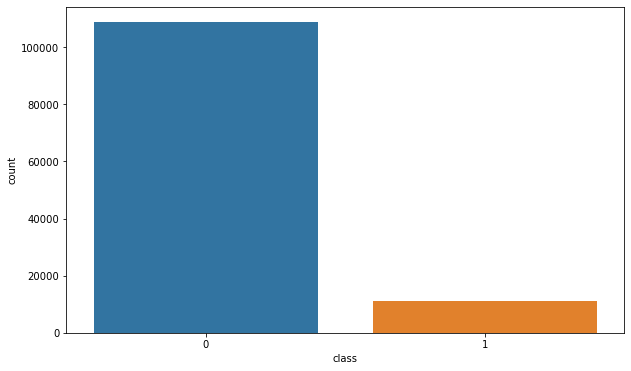

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['class'])

In [48]:
## There is a clear imbalance in the data

## Prediciton Models

In [49]:
## Loading libraries required

In [50]:
from sklearn.model_selection import train_test_split,StratifiedKFold

In [51]:
from sklearn.metrics import classification_report,plot_confusion_matrix,recall_score,accuracy_score,precision_score,plot_roc_curve,precision_score,accuracy_score

In [52]:
## Splitting data into features and target
X=df.drop(['user_id','signup_time','purchase_time','device_id','class'],axis=1)
y=df['class']

In [53]:
## Splitting data into Train and Test data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)

In [54]:
## Creating Cross Validation sets for validation before testing
cv=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)

### Oversampling data to balance classes

In [55]:
from imblearn.over_sampling import SMOTENC

In [56]:
## Using SMOTE to oversample data to balance classes
sm=SMOTENC(categorical_features=[1,2,3,6],random_state=42,sampling_strategy='minority') ### resamples data that doesn't belong to majority class

In [57]:
X_res,y_res=sm.fit_resample(X_train,y_train)

In [58]:
X_res

,purchase_value,source,browser,sex,age,ip_address,country,#times_device_used,#times_ip_used,time_gap
0,80,2,3,1,33,2.138401e+09,4,1,1,29578.000000
1,56,2,2,0,28,1.743976e+09,71,1,1,44656.000000
2,15,1,1,0,37,3.070562e+09,8,1,1,10093.000000
3,89,2,5,1,35,3.706374e+09,8,1,1,11190.000000
4,9,1,4,0,37,1.336691e+09,12,1,1,104830.000000
...,...,...,...,...,...,...,...,...,...,...
152223,9,2,2,1,46,2.300419e+09,0,11,11,0.000000
152224,58,1,1,1,40,1.876389e+09,8,1,1,125814.913036
152225,24,2,3,0,19,3.439851e+09,0,12,12,0.000000
152226,33,1,1,0,32,5.459210e+08,0,6,6,0.000000


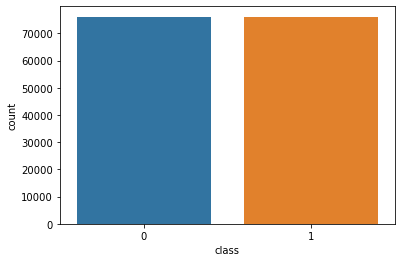

In [203]:
sns.countplot(x=y_res)
plt.show()

In [60]:
## Splitting data using train test split, test data obtained in this data can be considered as validation set

In [61]:
X_res_train,X_res_test,y_res_train,y_res_test= train_test_split(X_res,y_res,random_state=42,stratify=y_res,test_size=0.3)

In [ ]:
## Importing metrics

from sklearn.metrics import precision_score,recall_score,accuracy_score,roc_curve,precision_recall_curve,log_loss

In [63]:
def plot_roc_curve(y_true,y_pred):
    '''Plots ROC curve
    Input:y_true-True labels
    y_pred-Predicted Labels'''
    from sklearn.metrics import roc_curve,auc
    fpr,tpr,threshold=roc_curve(y_true,y_pred)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' %auc(fpr,tpr))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    

In [64]:
def plot_confusion_matrix(y_true,y_pred):
    '''Plots Confusion Matrix
    Input:y_true-True labels
    y_pred-Predicted Labels'''
    from sklearn.metrics import confusion_matrix
    sns.heatmap(confusion_matrix(y_true,y_pred),annot=True,cbar=False)
    plt.title('Confusion Matrix')
    

## Random Forest 

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [204]:
rf=RandomForestClassifier(class_weight='balanced')

In [205]:
rf.fit(X_res_train,y_res_train)

RandomForestClassifier(class_weight='balanced')

In [206]:
## predicting classes
y_pred_rf=rf.predict(X_res_test)

In [207]:
## predicting by using probability threshold
threshold=0.4
y_pred_rf_thresh=[1 if x >= threshold else 0 for x in (rf.predict_proba(X_res_test))[:,1]]

In [208]:
## predicting on unseen data
y_hat_rf_test=rf.predict(X_test)

In [209]:
## predicting on unseen data by applying threshold 
threshold=0.4
y_hat_rf_test_proba=[1 if x >= threshold else 0 for x in (rf.predict_proba(X_test))[:,1]]

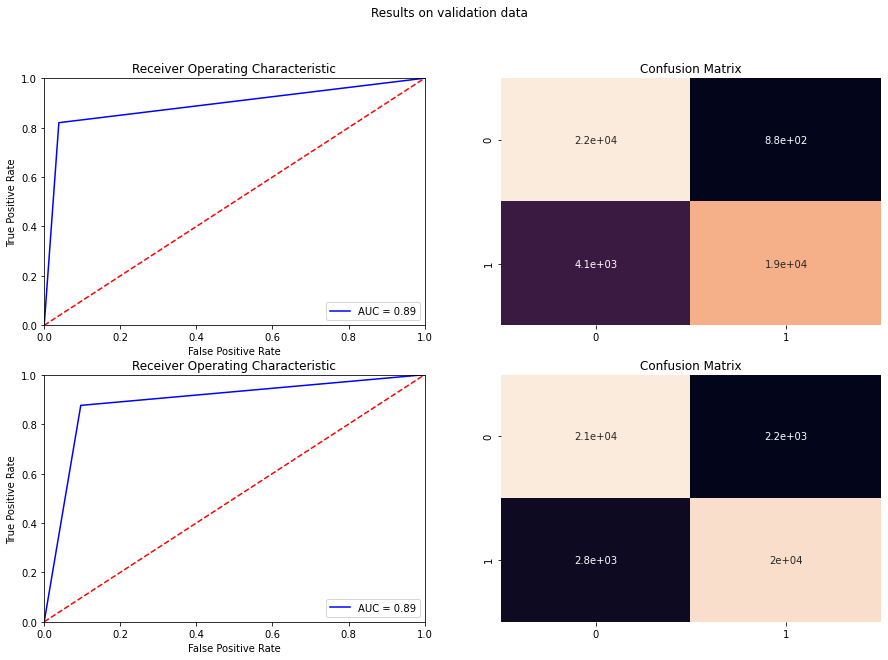

In [210]:
## Plotting Results on validation data
plt.figure(figsize=(15,10))
plt.suptitle('Results on validation data')
plt.subplot(221)
plot_roc_curve(y_res_test,y_pred_rf)
plt.subplot(222)
plot_confusion_matrix(y_res_test,y_pred_rf)
plt.subplot(223)
plot_roc_curve(y_res_test,y_pred_rf_thresh)
plt.subplot(224)
plot_confusion_matrix(y_res_test,y_pred_rf_thresh)

In [211]:
## No threshold
print(classification_report(y_res_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90     22835
           1       0.96      0.82      0.88     22834

    accuracy                           0.89     45669
   macro avg       0.90      0.89      0.89     45669
weighted avg       0.90      0.89      0.89     45669



In [212]:
## With threshold
print(classification_report(y_res_test,y_pred_rf_thresh))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     22835
           1       0.90      0.88      0.89     22834

    accuracy                           0.89     45669
   macro avg       0.89      0.89      0.89     45669
weighted avg       0.89      0.89      0.89     45669



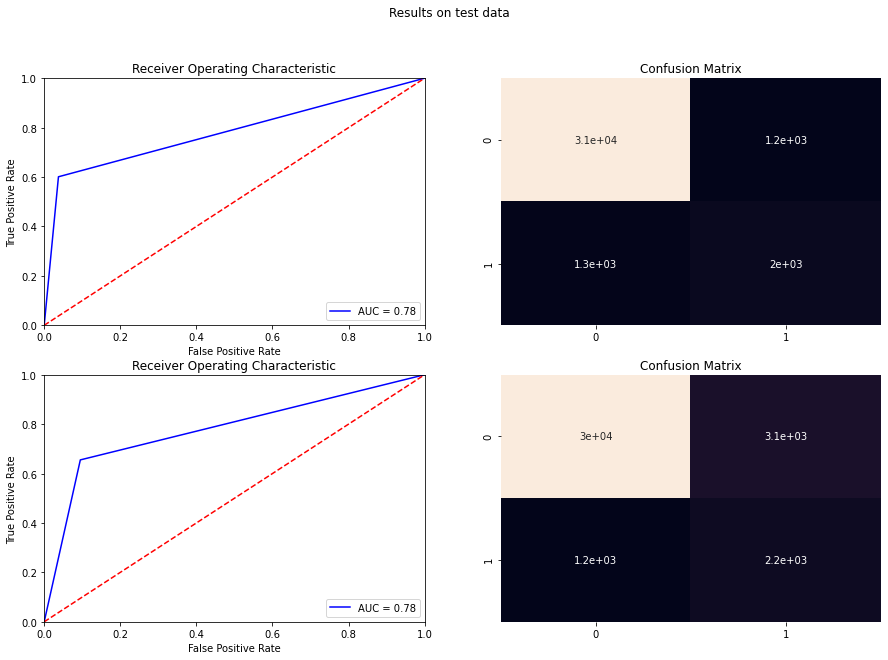

In [213]:
## Plotting Results on test data
plt.figure(figsize=(15,10))
plt.suptitle('Results on test data')
plt.subplot(221)
plot_roc_curve(y_test,y_hat_rf_test)
plt.subplot(222)
plot_confusion_matrix(y_test,y_hat_rf_test)
plt.subplot(223)
plot_roc_curve(y_test,y_hat_rf_test_proba)
plt.subplot(224)
plot_confusion_matrix(y_test,y_hat_rf_test_proba)

In [214]:
## No threshold
print(classification_report(y_test,y_hat_rf_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     32621
           1       0.62      0.60      0.61      3379

    accuracy                           0.93     36000
   macro avg       0.79      0.78      0.79     36000
weighted avg       0.93      0.93      0.93     36000



In [215]:
## With threshold
print(classification_report(y_test,y_hat_rf_test_proba))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93     32621
           1       0.42      0.66      0.51      3379

    accuracy                           0.88     36000
   macro avg       0.69      0.78      0.72     36000
weighted avg       0.91      0.88      0.89     36000



<AxesSubplot:>

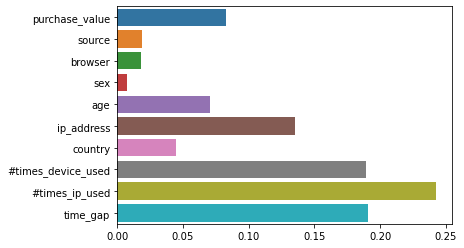

In [216]:
## Feature Importances
importances_rf=rf.feature_importances_

features_rf=X_res_train.columns

sns.barplot(y=features_rf,x=importances_rf)

## LightGBM

In [117]:
from lightgbm import LGBMClassifier

In [118]:
lgb=LGBMClassifier()

In [119]:
lgb.fit(X_res_train,y_res_train)

LGBMClassifier()

In [120]:
## predicting classes
y_pred_lgb=lgb.predict(X_res_test)

In [121]:
## predicting by using probability threshold
threshold=0.4
y_pred_lgb_thresh=[1 if x >= threshold else 0 for x in (lgb.predict_proba(X_res_test))[:,1]]

In [122]:
## predicting on unseen data
y_hat_lgb_test=lgb.predict(X_test)

In [123]:
## predicting on unseen data by applying threshold 
threshold=0.4
y_hat_lgb_test_proba=[1 if x >= threshold else 0 for x in (lgb.predict_proba(X_test))[:,1]]

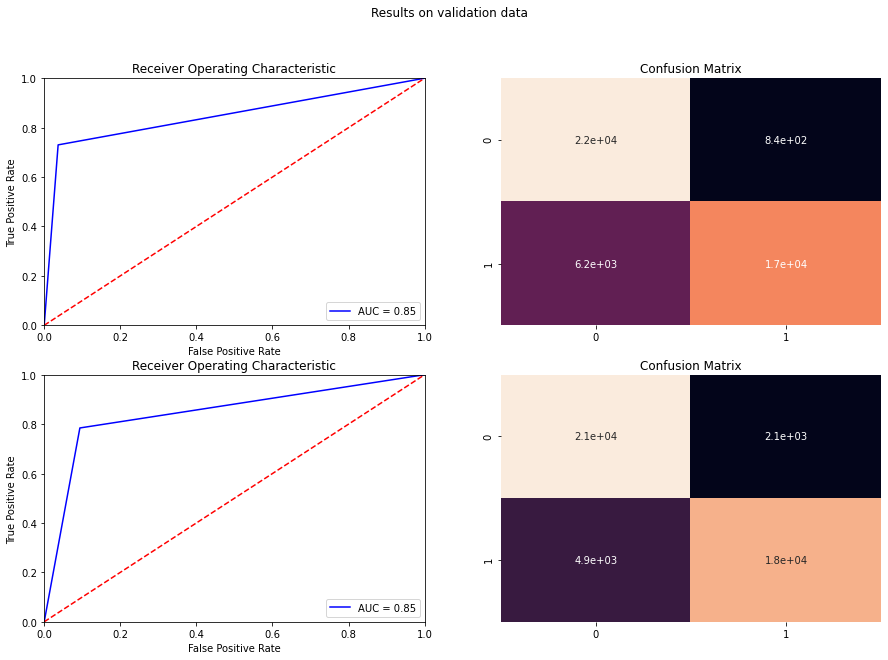

In [124]:
## Plotting Results on validation data
plt.figure(figsize=(15,10))
plt.suptitle('Results on validation data')
plt.subplot(221)
plot_roc_curve(y_res_test,y_pred_lgb)
plt.subplot(222)
plot_confusion_matrix(y_res_test,y_pred_lgb)
plt.subplot(223)
plot_roc_curve(y_res_test,y_pred_lgb_thresh)
plt.subplot(224)
plot_confusion_matrix(y_res_test,y_pred_lgb_thresh)

In [125]:
## No threshold
print(classification_report(y_res_test,y_pred_lgb))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86     22835
           1       0.95      0.73      0.83     22834

    accuracy                           0.85     45669
   macro avg       0.87      0.85      0.84     45669
weighted avg       0.87      0.85      0.84     45669



In [126]:
## With threshold
print(classification_report(y_res_test,y_pred_lgb_thresh))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85     22835
           1       0.89      0.78      0.84     22834

    accuracy                           0.85     45669
   macro avg       0.85      0.85      0.84     45669
weighted avg       0.85      0.85      0.84     45669



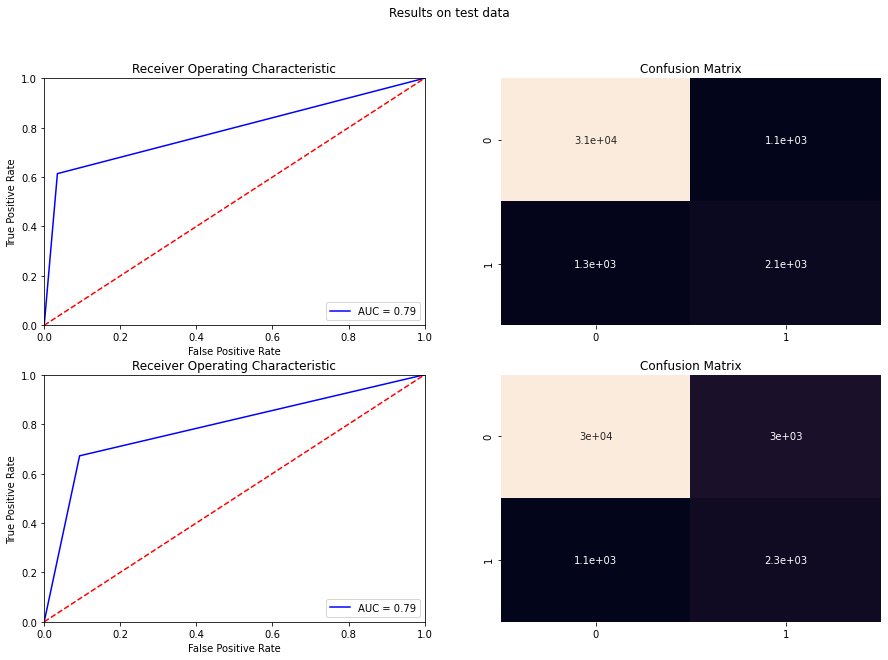

In [127]:
## Plotting Results on test data
plt.figure(figsize=(15,10))
plt.suptitle('Results on test data')
plt.subplot(221)
plot_roc_curve(y_test,y_hat_lgb_test)
plt.subplot(222)
plot_confusion_matrix(y_test,y_hat_lgb_test)
plt.subplot(223)
plot_roc_curve(y_test,y_hat_lgb_test_proba)
plt.subplot(224)
plot_confusion_matrix(y_test,y_hat_lgb_test_proba)

In [128]:
## No threshold
print(classification_report(y_test,y_hat_lgb_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     32621
           1       0.65      0.61      0.63      3379

    accuracy                           0.93     36000
   macro avg       0.80      0.79      0.80     36000
weighted avg       0.93      0.93      0.93     36000



In [129]:
## With threshold
print(classification_report(y_test,y_hat_lgb_test_proba))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93     32621
           1       0.43      0.67      0.52      3379

    accuracy                           0.88     36000
   macro avg       0.70      0.79      0.73     36000
weighted avg       0.91      0.88      0.90     36000



<AxesSubplot:>

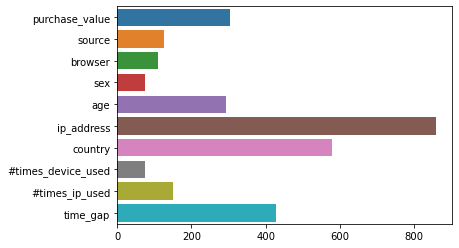

In [156]:
## Feature Importances
importances_lgb=lgb.feature_importances_

features_lgb=X_train.columns

sns.barplot(y=features_lgb,x=importances_lgb)

## Catboost

In [130]:
from catboost import CatBoostClassifier

In [131]:
cb=CatBoostClassifier()

In [143]:
cb.fit(X_res_train,y_res_train,cat_features=[1,2,3,6])

Learning rate set to 0.075634
0:	learn: 0.6226951	total: 91.2ms	remaining: 1m 31s
1:	learn: 0.5586504	total: 169ms	remaining: 1m 24s
2:	learn: 0.5193913	total: 260ms	remaining: 1m 26s
3:	learn: 0.4830703	total: 341ms	remaining: 1m 24s
4:	learn: 0.4636375	total: 411ms	remaining: 1m 21s
5:	learn: 0.4494999	total: 491ms	remaining: 1m 21s
6:	learn: 0.4351305	total: 593ms	remaining: 1m 24s
7:	learn: 0.4217532	total: 674ms	remaining: 1m 23s
8:	learn: 0.4139250	total: 770ms	remaining: 1m 24s
9:	learn: 0.4046485	total: 846ms	remaining: 1m 23s
10:	learn: 0.3986854	total: 938ms	remaining: 1m 24s
11:	learn: 0.3950184	total: 1.03s	remaining: 1m 24s
12:	learn: 0.3898978	total: 1.1s	remaining: 1m 23s
13:	learn: 0.3862856	total: 1.19s	remaining: 1m 23s
14:	learn: 0.3819305	total: 1.28s	remaining: 1m 24s
15:	learn: 0.3798280	total: 1.36s	remaining: 1m 23s
16:	learn: 0.3773928	total: 1.45s	remaining: 1m 23s
17:	learn: 0.3755033	total: 1.53s	remaining: 1m 23s
18:	learn: 0.3740336	total: 1.63s	remaining:

157:	learn: 0.3378877	total: 13.3s	remaining: 1m 10s
158:	learn: 0.3378027	total: 13.4s	remaining: 1m 10s
159:	learn: 0.3376936	total: 13.4s	remaining: 1m 10s
160:	learn: 0.3375998	total: 13.5s	remaining: 1m 10s
161:	learn: 0.3374825	total: 13.6s	remaining: 1m 10s
162:	learn: 0.3372606	total: 13.7s	remaining: 1m 10s
163:	learn: 0.3371383	total: 13.8s	remaining: 1m 10s
164:	learn: 0.3369590	total: 13.9s	remaining: 1m 10s
165:	learn: 0.3369183	total: 14s	remaining: 1m 10s
166:	learn: 0.3368040	total: 14.1s	remaining: 1m 10s
167:	learn: 0.3367016	total: 14.1s	remaining: 1m 10s
168:	learn: 0.3365913	total: 14.2s	remaining: 1m 9s
169:	learn: 0.3364999	total: 14.3s	remaining: 1m 9s
170:	learn: 0.3364649	total: 14.4s	remaining: 1m 9s
171:	learn: 0.3363655	total: 14.5s	remaining: 1m 9s
172:	learn: 0.3362725	total: 14.6s	remaining: 1m 9s
173:	learn: 0.3361462	total: 14.7s	remaining: 1m 9s
174:	learn: 0.3360455	total: 14.8s	remaining: 1m 9s
175:	learn: 0.3359790	total: 14.8s	remaining: 1m 9s
176

316:	learn: 0.3222120	total: 27.8s	remaining: 59.8s
317:	learn: 0.3220782	total: 27.9s	remaining: 59.8s
318:	learn: 0.3219787	total: 28s	remaining: 59.8s
319:	learn: 0.3219193	total: 28.1s	remaining: 59.7s
320:	learn: 0.3218911	total: 28.2s	remaining: 59.7s
321:	learn: 0.3218310	total: 28.3s	remaining: 59.6s
322:	learn: 0.3217564	total: 28.4s	remaining: 59.5s
323:	learn: 0.3216510	total: 28.5s	remaining: 59.5s
324:	learn: 0.3215994	total: 28.6s	remaining: 59.4s
325:	learn: 0.3215208	total: 28.7s	remaining: 59.3s
326:	learn: 0.3214015	total: 28.8s	remaining: 59.2s
327:	learn: 0.3213276	total: 28.9s	remaining: 59.2s
328:	learn: 0.3212412	total: 29s	remaining: 59.1s
329:	learn: 0.3211740	total: 29.1s	remaining: 59s
330:	learn: 0.3211277	total: 29.2s	remaining: 58.9s
331:	learn: 0.3210428	total: 29.3s	remaining: 58.9s
332:	learn: 0.3209332	total: 29.5s	remaining: 59s
333:	learn: 0.3208391	total: 29.6s	remaining: 58.9s
334:	learn: 0.3207456	total: 29.7s	remaining: 58.9s
335:	learn: 0.320727

477:	learn: 0.3111971	total: 43.1s	remaining: 47.1s
478:	learn: 0.3111784	total: 43.2s	remaining: 47s
479:	learn: 0.3110772	total: 43.3s	remaining: 46.9s
480:	learn: 0.3109681	total: 43.4s	remaining: 46.8s
481:	learn: 0.3108788	total: 43.5s	remaining: 46.7s
482:	learn: 0.3108087	total: 43.6s	remaining: 46.7s
483:	learn: 0.3107703	total: 43.7s	remaining: 46.6s
484:	learn: 0.3106066	total: 43.8s	remaining: 46.5s
485:	learn: 0.3105477	total: 43.9s	remaining: 46.4s
486:	learn: 0.3104734	total: 44s	remaining: 46.3s
487:	learn: 0.3104482	total: 44.1s	remaining: 46.3s
488:	learn: 0.3104096	total: 44.2s	remaining: 46.2s
489:	learn: 0.3102684	total: 44.3s	remaining: 46.1s
490:	learn: 0.3101793	total: 44.4s	remaining: 46s
491:	learn: 0.3100614	total: 44.5s	remaining: 45.9s
492:	learn: 0.3100498	total: 44.6s	remaining: 45.8s
493:	learn: 0.3100178	total: 44.7s	remaining: 45.7s
494:	learn: 0.3099527	total: 44.7s	remaining: 45.6s
495:	learn: 0.3098877	total: 44.8s	remaining: 45.6s
496:	learn: 0.3098

637:	learn: 0.3011188	total: 58.3s	remaining: 33.1s
638:	learn: 0.3010536	total: 58.4s	remaining: 33s
639:	learn: 0.3009846	total: 58.5s	remaining: 32.9s
640:	learn: 0.3009606	total: 58.5s	remaining: 32.8s
641:	learn: 0.3009057	total: 58.6s	remaining: 32.7s
642:	learn: 0.3008765	total: 58.7s	remaining: 32.6s
643:	learn: 0.3007845	total: 58.8s	remaining: 32.5s
644:	learn: 0.3007369	total: 58.9s	remaining: 32.4s
645:	learn: 0.3006760	total: 59s	remaining: 32.3s
646:	learn: 0.3006525	total: 59.1s	remaining: 32.2s
647:	learn: 0.3006073	total: 59.2s	remaining: 32.1s
648:	learn: 0.3005261	total: 59.3s	remaining: 32.1s
649:	learn: 0.3004634	total: 59.4s	remaining: 32s
650:	learn: 0.3003537	total: 59.5s	remaining: 31.9s
651:	learn: 0.3003463	total: 59.6s	remaining: 31.8s
652:	learn: 0.3001901	total: 59.7s	remaining: 31.7s
653:	learn: 0.3001467	total: 59.7s	remaining: 31.6s
654:	learn: 0.3000762	total: 59.8s	remaining: 31.5s
655:	learn: 0.2999999	total: 60s	remaining: 31.5s
656:	learn: 0.299942

797:	learn: 0.2929791	total: 1m 14s	remaining: 18.8s
798:	learn: 0.2929123	total: 1m 14s	remaining: 18.7s
799:	learn: 0.2928661	total: 1m 14s	remaining: 18.6s
800:	learn: 0.2927747	total: 1m 14s	remaining: 18.5s
801:	learn: 0.2927174	total: 1m 14s	remaining: 18.4s
802:	learn: 0.2926420	total: 1m 14s	remaining: 18.4s
803:	learn: 0.2926143	total: 1m 14s	remaining: 18.3s
804:	learn: 0.2925307	total: 1m 14s	remaining: 18.2s
805:	learn: 0.2924503	total: 1m 15s	remaining: 18.1s
806:	learn: 0.2923924	total: 1m 15s	remaining: 18s
807:	learn: 0.2923751	total: 1m 15s	remaining: 17.9s
808:	learn: 0.2923380	total: 1m 15s	remaining: 17.8s
809:	learn: 0.2922783	total: 1m 15s	remaining: 17.7s
810:	learn: 0.2922297	total: 1m 15s	remaining: 17.6s
811:	learn: 0.2921458	total: 1m 15s	remaining: 17.5s
812:	learn: 0.2920972	total: 1m 15s	remaining: 17.4s
813:	learn: 0.2920695	total: 1m 15s	remaining: 17.3s
814:	learn: 0.2920089	total: 1m 15s	remaining: 17.2s
815:	learn: 0.2919157	total: 1m 16s	remaining: 1

954:	learn: 0.2854648	total: 1m 31s	remaining: 4.32s
955:	learn: 0.2853588	total: 1m 31s	remaining: 4.23s
956:	learn: 0.2852925	total: 1m 31s	remaining: 4.13s
957:	learn: 0.2852534	total: 1m 32s	remaining: 4.04s
958:	learn: 0.2851763	total: 1m 32s	remaining: 3.94s
959:	learn: 0.2851441	total: 1m 32s	remaining: 3.85s
960:	learn: 0.2850763	total: 1m 32s	remaining: 3.75s
961:	learn: 0.2850501	total: 1m 32s	remaining: 3.65s
962:	learn: 0.2850484	total: 1m 32s	remaining: 3.56s
963:	learn: 0.2850012	total: 1m 32s	remaining: 3.46s
964:	learn: 0.2849797	total: 1m 32s	remaining: 3.37s
965:	learn: 0.2849294	total: 1m 32s	remaining: 3.27s
966:	learn: 0.2848674	total: 1m 33s	remaining: 3.18s
967:	learn: 0.2848211	total: 1m 33s	remaining: 3.08s
968:	learn: 0.2848178	total: 1m 33s	remaining: 2.98s
969:	learn: 0.2847765	total: 1m 33s	remaining: 2.89s
970:	learn: 0.2847401	total: 1m 33s	remaining: 2.79s
971:	learn: 0.2846996	total: 1m 33s	remaining: 2.69s
972:	learn: 0.2846371	total: 1m 33s	remaining:

In [144]:
## predicting classes
y_pred_cb=cb.predict(X_res_test)

In [145]:
## predicting by using probability threshold
threshold=0.4
y_pred_cb_thresh=[1 if x >= threshold else 0 for x in (cb.predict_proba(X_res_test))[:,1]]

In [146]:
## predicting on unseen data
y_hat_cb_test=cb.predict(X_test)

In [147]:
## predicting on unseen data by applying threshold 
threshold=0.4
y_hat_cb_test_proba=[1 if x >= threshold else 0 for x in (cb.predict_proba(X_test))[:,1]]

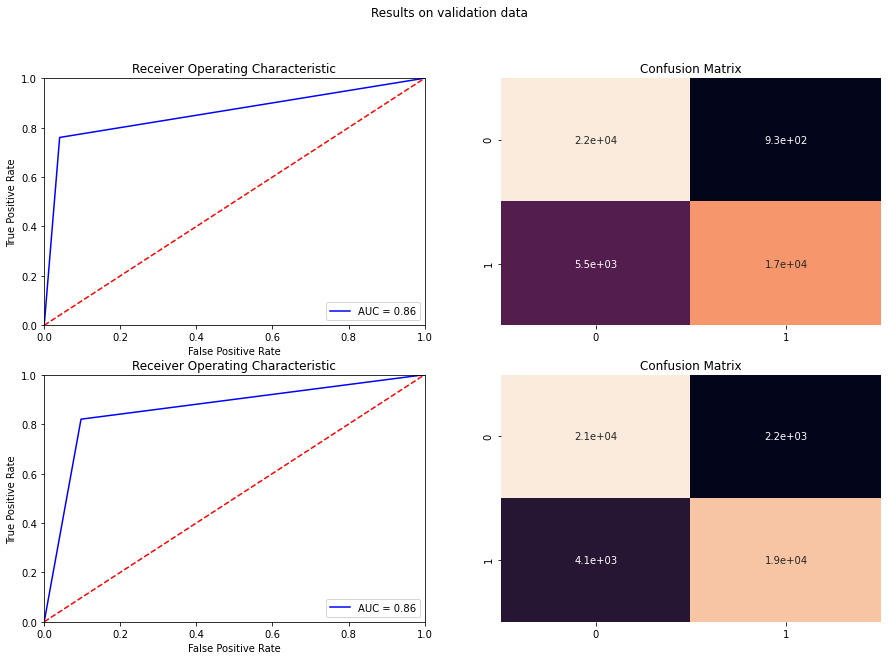

In [148]:
## Plotting Results on validation data
plt.figure(figsize=(15,10))
plt.suptitle('Results on validation data')
plt.subplot(221)
plot_roc_curve(y_res_test,y_pred_cb)
plt.subplot(222)
plot_confusion_matrix(y_res_test,y_pred_cb)
plt.subplot(223)
plot_roc_curve(y_res_test,y_pred_cb_thresh)
plt.subplot(224)
plot_confusion_matrix(y_res_test,y_pred_cb_thresh)

In [149]:
## No threshold
print(classification_report(y_res_test,y_pred_cb))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87     22835
           1       0.95      0.76      0.84     22834

    accuracy                           0.86     45669
   macro avg       0.87      0.86      0.86     45669
weighted avg       0.87      0.86      0.86     45669



In [150]:
## With threshold
print(classification_report(y_res_test,y_pred_cb_thresh))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87     22835
           1       0.89      0.82      0.86     22834

    accuracy                           0.86     45669
   macro avg       0.86      0.86      0.86     45669
weighted avg       0.86      0.86      0.86     45669



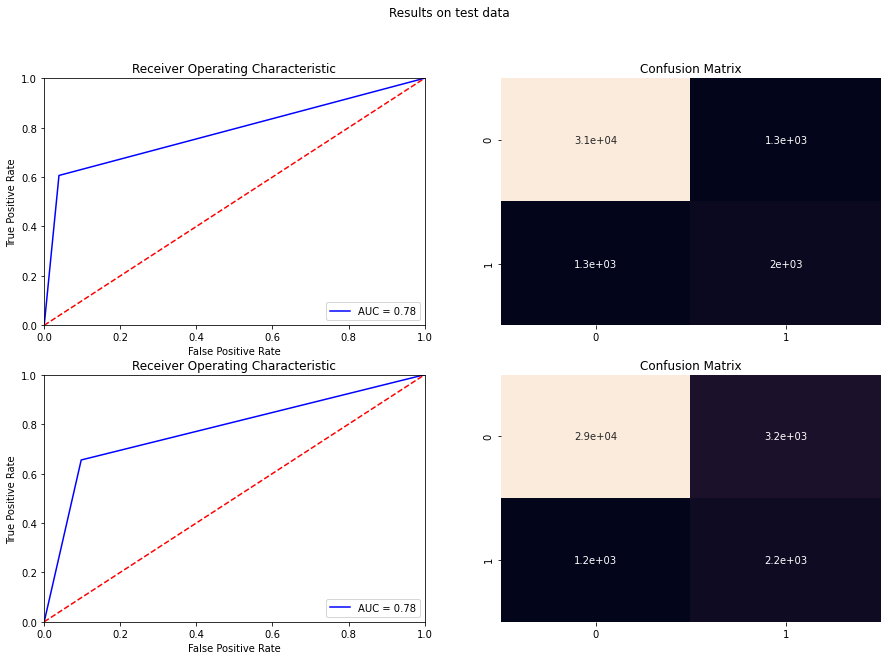

In [151]:
## Plotting Results on test data
plt.figure(figsize=(15,10))
plt.suptitle('Results on test data')
plt.subplot(221)
plot_roc_curve(y_test,y_hat_cb_test)
plt.subplot(222)
plot_confusion_matrix(y_test,y_hat_cb_test)
plt.subplot(223)
plot_roc_curve(y_test,y_hat_cb_test_proba)
plt.subplot(224)
plot_confusion_matrix(y_test,y_hat_cb_test_proba)

In [152]:
## No threshold
print(classification_report(y_test,y_hat_cb_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     32621
           1       0.62      0.61      0.61      3379

    accuracy                           0.93     36000
   macro avg       0.79      0.78      0.79     36000
weighted avg       0.93      0.93      0.93     36000



In [153]:
## With threshold
print(classification_report(y_test,y_hat_cb_test_proba))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     32621
           1       0.41      0.65      0.50      3379

    accuracy                           0.88     36000
   macro avg       0.69      0.78      0.72     36000
weighted avg       0.91      0.88      0.89     36000



<AxesSubplot:>

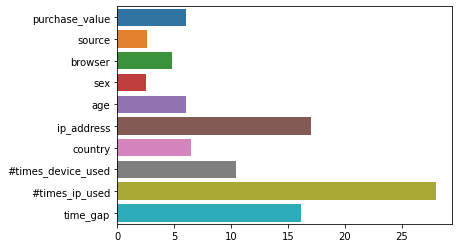

In [157]:
## Feature Importances
importances_cb=cb.feature_importances_

features_cb=X_train.columns

sns.barplot(y=features_cb,x=importances_cb)

### Initial Insights from all three prediction models:

###### 1) All three models perform equally well on both validation and test data.

###### 2) All models consider the features obtained by feature engineering as very important features in prediction.

###### 3) In this scenario, The transaction which is fraud shouldn't be predicted as not fraud. Hence, False Negatives should be reduced. Therefore, Recall is considered as an important metrics, If recall increases , the number of False Negatives decreases. 

###### 4) Increasing Recall might dent accuracy of prediction, but it can be afforded as cost of false negatives is very high. Therefore, the predictions obtained are based on changing the probaility threshold to increase recall

###### 5) As all the algorithms perform similarly, the algorithm that uses less computational power and is fastest considered best, Therefore, considering Random Forest as best model


## Hyperparameter Tuning

In [217]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [233]:
# RF parameters
rf_clf_params = {
    
    'max_depth':        hp.choice('max_depth',        np.arange(1, 16, 1, dtype=int)),
    'n_estimators':     hp.choice('n_estimators', np.arange(100,550,50)),
}

rf_para = dict()
rf_para['clf_params'] = rf_clf_params

rf_para['loss_func' ] = lambda y, pred: log_loss(y, pred)

In [234]:
class HPOpt(object):

    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test  = x_test
        self.y_train = y_train
        self.y_test  = y_test

    def process(self, fn_name, space, trials, algo, max_evals):
        fn = getattr(self, fn_name)
        try:
            result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)
        except Exception as e:
            return {'status': STATUS_FAIL,
                    'exception': str(e)}
        return result, trials

    def rf_clf(self, para):
        clf = RandomForestClassifier(**para['clf_params'])
        return self.train_clf(clf, para)
    
    def train_clf(self, clf, para):
        clf.fit(self.x_train, self.y_train)
        pred = clf.predict(self.x_test)
        loss = para['loss_func'](self.y_test, pred)
        return {'loss': loss, 'status': STATUS_OK}

In [235]:
obj = HPOpt(X_res_train, X_res_test, y_res_train, y_res_test)

In [236]:
rf_opt = obj.process(fn_name='rf_clf', space=rf_para, trials=Trials(), algo=tpe.suggest, max_evals=100)

100%|███████████████████████████████████████████████| 100/100 [49:57<00:00, 29.97s/trial, best loss: 5.334842779241816]


In [237]:
### Hyper parameter tuning results
rf_opt

({'max_depth': 14, 'n_estimators': 1}, <hyperopt.base.Trials at 0x1f603e87430>)

In [238]:
np.arange(100,550,50)[1]

150

In [239]:
np.arange(1, 16, 1, dtype=int)[14]

15

### Hyperparameter Tuned Random Forest

In [269]:
rf_tuned=RandomForestClassifier(n_estimators=150,max_depth=15)

In [270]:
rf_tuned.fit(X_res_train,y_res_train)

RandomForestClassifier(max_depth=15, n_estimators=150)

In [271]:
## predicting classes
y_pred_rf_tuned=rf_tuned.predict(X_res_test)

In [272]:
## predicting by using probability threshold
threshold=0.4
y_pred_rf_tuned_thresh=[1 if x >= threshold else 0 for x in (rf_tuned.predict_proba(X_res_test))[:,1]]

In [273]:
## predicting on unseen data
y_hat_rf_tuned_test=rf_tuned.predict(X_test)

In [274]:
## predicting on unseen data by applying threshold 
threshold=0.4
y_hat_rf_tuned_test_proba=[1 if x >= threshold else 0 for x in (rf_tuned.predict_proba(X_test))[:,1]]

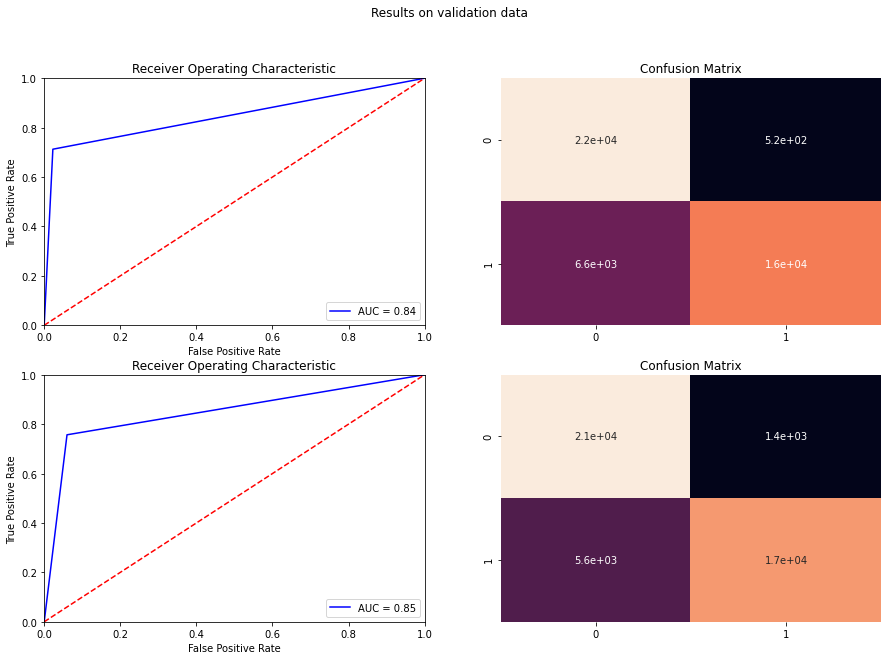

In [275]:
## Plotting Results on validation data
plt.figure(figsize=(15,10))
plt.suptitle('Results on validation data')
plt.subplot(221)
plot_roc_curve(y_res_test,y_pred_rf_tuned)
plt.subplot(222)
plot_confusion_matrix(y_res_test,y_pred_rf_tuned)
plt.subplot(223)
plot_roc_curve(y_res_test,y_pred_rf_tuned_thresh)
plt.subplot(224)
plot_confusion_matrix(y_res_test,y_pred_rf_tuned_thresh)

In [276]:
## No threshold
print(classification_report(y_res_test,y_pred_rf_tuned))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86     22835
           1       0.97      0.71      0.82     22834

    accuracy                           0.84     45669
   macro avg       0.87      0.84      0.84     45669
weighted avg       0.87      0.84      0.84     45669



In [277]:
## With threshold
print(classification_report(y_res_test,y_pred_rf_tuned_thresh))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86     22835
           1       0.93      0.76      0.83     22834

    accuracy                           0.85     45669
   macro avg       0.86      0.85      0.85     45669
weighted avg       0.86      0.85      0.85     45669



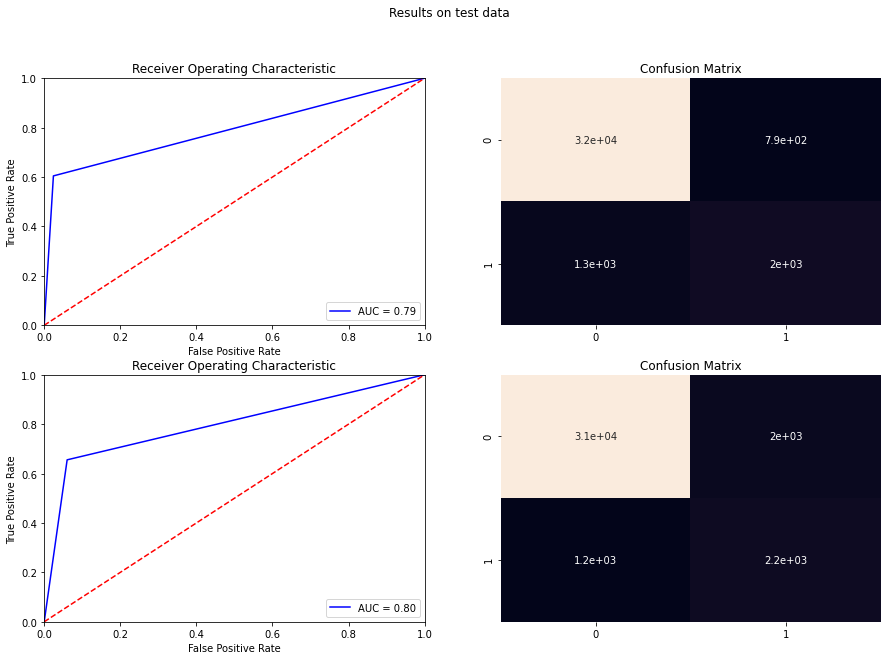

In [278]:
## Plotting Results on test data
plt.figure(figsize=(15,10))
plt.suptitle('Results on test data')
plt.subplot(221)
plot_roc_curve(y_test,y_hat_rf_tuned_test)
plt.subplot(222)
plot_confusion_matrix(y_test,y_hat_rf_tuned_test)
plt.subplot(223)
plot_roc_curve(y_test,y_hat_rf_tuned_test_proba)
plt.subplot(224)
plot_confusion_matrix(y_test,y_hat_rf_tuned_test_proba)

In [279]:
## No threshold
print(classification_report(y_test,y_hat_rf_tuned_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     32621
           1       0.72      0.60      0.66      3379

    accuracy                           0.94     36000
   macro avg       0.84      0.79      0.81     36000
weighted avg       0.94      0.94      0.94     36000



In [280]:
## With threshold
print(classification_report(y_test,y_hat_rf_tuned_test_proba))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     32621
           1       0.53      0.66      0.59      3379

    accuracy                           0.91     36000
   macro avg       0.75      0.80      0.77     36000
weighted avg       0.92      0.91      0.92     36000



<AxesSubplot:>

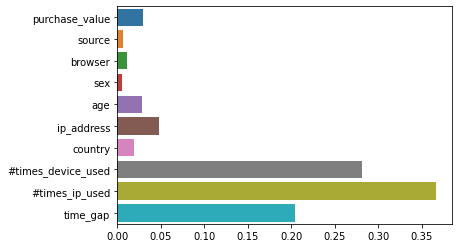

In [281]:
## Feature Importances
importances_rf_tuned=rf_tuned.feature_importances_

features_rf_tuned=X_res_train.columns

sns.barplot(y=features_rf_tuned,x=importances_rf_tuned)

### Results after parameter tuning

###### 1) There is a little improvement on test set after parameter tuning in AUC score from 0.78 to 0.79 with classes and 0.78 to 0.80 using probability threshold.
###### 2) There is significant improvement in the Accuracy though the Recall of 0.66 is maintained, The accuracy increased by 3% from 88% to 91%
###### 3) Hence, The most valuable predictor is RandomForestClassifier(n_estimators=150,max_depth=15)

# Conclusion

#### Data Analysis:
###### 1) There are no null,duplicated and  NaN values in the given data frame.
###### 2) It is observed that few devices and IP addresses have been used multiple times.

#### Feature Engineering:
###### 1) Fetching country based on ip address
###### 2) Finding number of times each device and ip address have been used
###### 3) Finding Time between signup and first purchase
###### 4) Assigning numerical values to browser,source,country and sex columns, converting them to categorical values
###### 5) Treating class imbalances by oversampling data

#### Prediction Models:
###### 1) Using Random Forest, LightGBM and Catboost models to find the best base predictor model
###### 2) Recall is important metrics, Because Cost of False Negatives is very high
###### 3) Selecting Random Forest and Tuning Hyperparameters using Hyperopt to obtain best optimized model
###### 4) Most Valuable predictor is named as rf_tuned, RandomForestClassifier(n_estimators=150, max_depth=15)

#### Function for data preparation to test

In [288]:
def prepare_data(data):
    '''This function transforms the data set into data set possible to use the above predictors.
    It creates required features and converts the columns as required by predictor
    Input: DataFrame containing test data
    Output: Transformed DataFrame'''
    
    test_device=times_device_used(data)
    test_ip=times_ip_used(data)
    data=data.merge(right=test_device,how='left')
    data=data.merge(right=test_ip,how='left')
    
    data['signup_time']=pd.to_datetime(data['signup_time'])
    data['purchase_time']=pd.to_datetime(data['purchase_time'])
    data['time_gap']=(data['purchase_time']-data['signup_time']).astype('timedelta64[m]')
    data['browser']=data['browser'].map({'Chrome':1,'IE':2,'Safari':3,'FireFox':4,'Opera':5})

    data['source']=data['source'].map({'SEO':1,'Ads':2,'Direct':3})

    data['sex']=data['sex'].map({'M':0,'F':1})

    data['country']=data['ip_address'].map(ip_to_country)
    data['country']=data['country'].factorize()[0]
    
    cat_cols=['source','browser','sex','class','country','device_id','user_id']

    for i in cat_cols:
        data[i]=data[i].astype('category')
    
    return data